<a href="https://colab.research.google.com/github/naoya1110/nitkc-ncku-ai-robotics/blob/main/_Supplemental_Week1_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is supplemental notebook for Week1.

In this example, we are going to implement a linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [104]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here we create a dataset of $x$ (input) and $y$ (output) with a simple linear function below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

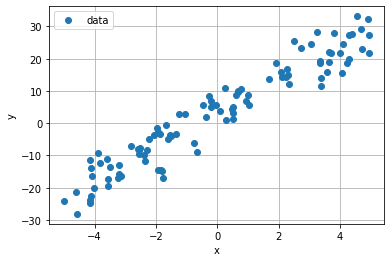

In [105]:
x = 10*np.random.rand(100)-5
noise = 5*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [106]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=5.136, b=3.217


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

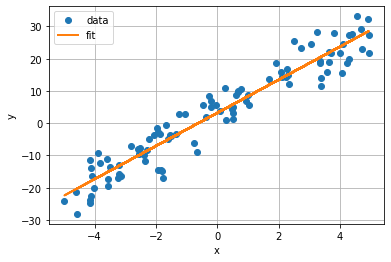

In [107]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [108]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` to predict output values of $y$ from input values of $x$ with the parameters of $w$ and $b$.

In [109]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to determine mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This type of function is called loss function which can be used for measuring how wrong the model prediction was.

In [110]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what are $w$ and $b$ exactly. So we initialize those values with arbitary numbers.

In [111]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

Now we can make a prediction using `model()`

In [112]:
p = model(x)
print(p)

tensor([-11.7284,   9.8811,   8.7748,  -1.5742,  -7.2284,  -4.1247, -12.7101,
          9.0249,   9.1765,  13.0394,  -8.7973,   9.1713,   1.8455,  -1.1256,
          0.5124, -10.3695,   9.7155,  -6.3388,  -9.4392, -15.9476,  -6.8296,
        -13.3532,  -7.9131, -13.4783,   5.7245,  -4.7102,  -5.0616,  -0.1217,
         11.1980, -11.5168,  -6.8594,  -5.8543,   8.1051,  -6.0388, -13.4085,
         10.0870,   2.0201,  -0.7597,  -3.3116,  13.7774,  11.8663,  13.1381,
        -13.4588,  -8.6599,  -2.9813,   5.2875,  12.6969,   4.7663,  11.0351,
        -14.7670, -12.4664,  -1.7830, -10.6035,  10.4284,   9.9443,   6.0411,
         -8.2080,   0.8459,   6.5321, -11.8168,  -8.6248,   2.0953,   8.9970,
        -13.0550, -10.6078,  12.1454,  11.6719,   5.8175,  -6.4146,   5.2420,
        -13.3301,  -6.8279,   7.1681,  -7.6916,  -2.1434,   5.9122,   0.4192,
         -8.5308, -10.7282,  -0.2557,  -6.5325,   0.4810,  -5.5434,  -2.4208,
         -6.6437,  13.7045, -13.2220,  11.8270,  -5.6372,  13.80

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [113]:
loss = loss_func(p, y)
print(loss)

tensor(76.6486, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss around current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients can be accessed by `w.grad` and `b.grad`.

In [114]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-36.4497)
tensor(-8.3692)


Then we can update $w$ and $b$ in response to their gradients and `lr`. `lr` is called learning rate which controls how much parameters to change in respose to the gradients.

When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated.

In [115]:
lr = 0.1

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr         # update w
    b -= b.grad*lr          # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values (w=5.0, b=3.0) than the initial values (w=3.0, b=-1.0)

In [116]:
print(w)
print(b)

tensor(6.6450, requires_grad=True)
tensor(-0.1631, requires_grad=True)


In order to optimize `w` and `b` further, we repeat above process many times.

In [117]:
lr = 0.1
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):
 
    p = model(x) #prediction
    loss = mse(p, y)
    loss.backward()

    with torch.no_grad():
        w -= w.grad*lr
        b -= b.grad*lr
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=76.649, w=6.645, b=-0.163
Epoch 2, loss=51.152, w=4.051, b=0.517
Epoch 3, loss=37.361, w=5.901, b=1.054
Epoch 4, loss=29.817, w=4.584, b=1.489
Epoch 5, loss=25.640, w=5.524, b=1.833
Epoch 6, loss=23.297, w=4.855, b=2.111
Epoch 7, loss=21.965, w=5.332, b=2.331
Epoch 8, loss=21.198, w=4.993, b=2.509
Epoch 9, loss=20.750, w=5.235, b=2.650
Epoch 10, loss=20.485, w=5.063, b=2.764
Epoch 11, loss=20.327, w=5.186, b=2.854
Epoch 12, loss=20.231, w=5.099, b=2.927
Epoch 13, loss=20.173, w=5.161, b=2.985
Epoch 14, loss=20.137, w=5.117, b=3.031
Epoch 15, loss=20.115, w=5.149, b=3.068
Epoch 16, loss=20.101, w=5.126, b=3.098
Epoch 17, loss=20.092, w=5.142, b=3.122
Epoch 18, loss=20.087, w=5.131, b=3.141
Epoch 19, loss=20.083, w=5.139, b=3.156
Epoch 20, loss=20.081, w=5.133, b=3.168
Epoch 21, loss=20.080, w=5.138, b=3.178
Epoch 22, loss=20.079, w=5.135, b=3.186
Epoch 23, loss=20.078, w=5.137, b=3.192
Epoch 24, loss=20.078, w=5.135, b=3.197
Epoch 25, loss=20.078, w=5.136, b=3.201
Epoch 26

Now you see w is close to 5.0 and b is close to 3.0.

Let's visualize how the loss value decreased.

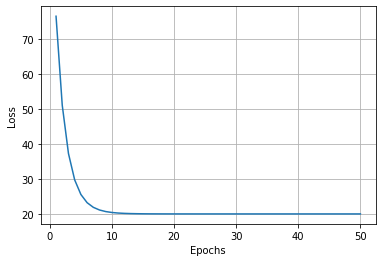

In [118]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

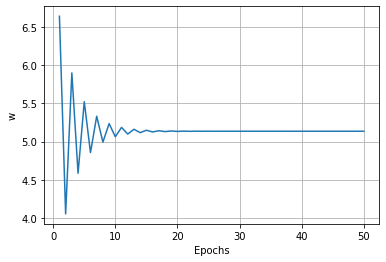

In [119]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

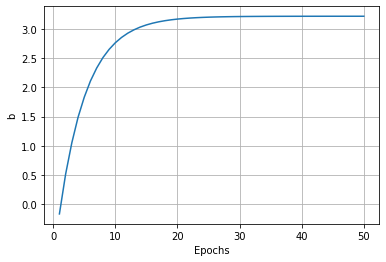

In [120]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.